<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Survey Dataset**


## Load the dataset


Import the required libraries.


In [165]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

The dataset is available on the IBM Cloud at the below url.


In [166]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

Load the data available at dataset_url into a dataframe.


In [167]:
survey_df = pd.read_csv(r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

## Explore the data set


It is a good idea to print the top 5 rows of the dataset to get a feel of how the dataset will look.


Display the top 5 rows and columns from your dataset.


In [168]:
survey_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Find out the number of rows and columns


Start by exploring the numbers of rows and columns of data in the dataset.


In [169]:
survey_df.shape

(11552, 85)

Print the number of columns in the dataset.


In [170]:
print(survey_df.shape[1])

85


## Identify the data types of each column


Explore the dataset and identify the data types of each column.


Print the datatype of all columns.


In [171]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11552 non-null  int64  
 1   MainBranch              11552 non-null  object 
 2   Hobbyist                11552 non-null  object 
 3   OpenSourcer             11552 non-null  object 
 4   OpenSource              11471 non-null  object 
 5   Employment              11552 non-null  object 
 6   Country                 11552 non-null  object 
 7   Student                 11499 non-null  object 
 8   EdLevel                 11436 non-null  object 
 9   UndergradMajor          10812 non-null  object 
 10  EduOther                11388 non-null  object 
 11  OrgSize                 11454 non-null  object 
 12  DevType                 11485 non-null  object 
 13  YearsCode               11543 non-null  object 
 14  Age1stCode              11539 non-null

Print the mean age of the survey participants.


In [172]:
round(survey_df['Age'].mean(),2)

30.77

The dataset is the result of a world wide survey. Print how many unique countries are there in the Country column.


In [173]:
survey_df['Country'].nunique()

135

# **Data Wrangling**

## Objectives

-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

-   Impute the missing values in the dataset.

-   Normalize data in the dataset.

## Finding duplicates

In [174]:
# Find how many duplicate rows exist in the dataframe.
survey_df['has_duplicates'] = survey_df.duplicated(['Respondent'], keep = False)
survey_df.value_counts('has_duplicates')

has_duplicates
False    11305
True       247
dtype: int64

#### There are 247 duplicate respondents in survey_df

## Removing duplicates

In [175]:
#Deleting duplicates
survey_df = survey_df.drop_duplicates(keep = False)
survey_df.shape

(11305, 86)

In [176]:
# .drop of 'has_duplicates' columns
survey_df = survey_df.drop(['has_duplicates'], axis = 1)

In [177]:
# Verify if duplicates were actually dropped.
survey_df.shape

(11305, 85)

In [178]:
survey_df['Respondent'].nunique()

11305

In [179]:
survey_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Finding Missing values

In [180]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11305 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11305 non-null  int64  
 1   MainBranch              11305 non-null  object 
 2   Hobbyist                11305 non-null  object 
 3   OpenSourcer             11305 non-null  object 
 4   OpenSource              11224 non-null  object 
 5   Employment              11305 non-null  object 
 6   Country                 11305 non-null  object 
 7   Student                 11255 non-null  object 
 8   EdLevel                 11195 non-null  object 
 9   UndergradMajor          10570 non-null  object 
 10  EduOther                11141 non-null  object 
 11  OrgSize                 11210 non-null  object 
 12  DevType                 11241 non-null  object 
 13  YearsCode               11296 non-null  object 
 14  Age1stCode              11292 non-null

In [181]:
# Find out how many rows are missing in the column 'Country'
missing = survey_df['Country'].isnull()
survey_df[missing].shape

(0, 85)

In [182]:
# Find out how many rows are missing in the column 'WorkLoc'
missing = survey_df['WorkLoc'].isnull()
survey_df[missing].shape

(32, 85)

## Imputing missing values

In [184]:
#Find the  value counts for the column WorkLoc.
survey_df['WorkLoc'].value_counts(dropna=False)
print('the majority works from office')

the majority works from office


In [185]:
#Find the  value counts for the column Employment.
survey_df['Employment'].value_counts(dropna=False)

Employed full-time    10880
Employed part-time      425
Name: Employment, dtype: int64

In [186]:
survey_df['UndergradMajor'].value_counts(dropna=False)

Computer science, computer engineering, or software engineering          6894
Information systems, information technology, or system administration     787
Another engineering discipline (ex. civil, electrical, mechanical)        751
NaN                                                                       735
Web development or web design                                             406
A natural science (ex. biology, chemistry, physics)                       399
Mathematics or statistics                                                 370
A business discipline (ex. accounting, finance, marketing)                242
A social science (ex. anthropology, psychology, political science)        209
A humanities discipline (ex. literature, history, philosophy)             206
Fine arts or performing arts (ex. graphic design, music, studio art)      159
I never declared a major                                                  123
A health science (ex. nursing, pharmacy, radiology)             

#### Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.

In [187]:
survey_df['WorkLoc'].fillna('Office', inplace=True)

In [188]:
# Verify if imputing was successful.
survey_df['WorkLoc'].value_counts(dropna=False)

Office                                            6779
Home                                              3559
Other place, such as a coworking space or cafe     967
Name: WorkLoc, dtype: int64

# **Exploratory Data Analysis**

## Objectives

*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.

## Outliers

In [190]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [191]:
# Find out if outliers exist in the column NormalizedAnnualCompensation using a box plot?
fig = px.box(x=survey_df['ConvertedComp'],title="Distribution of Salary")
fig.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.

In [192]:
Q1= survey_df['ConvertedComp'].quantile(q=0.25)
Q3= survey_df['ConvertedComp'].quantile(q=0.75)  
IQR= Q3 - Q1  
IQR

72988.0

In [193]:
# Find out the upper and lower bounds
upper_bound = Q3+IQR*1.5
lower_bound = Q1-IQR*1.5

print(upper_bound)
print(lower_bound)

209482.0
-82470.0


Identify how many outliers are there in the ConvertedComp column.

In [194]:
# your code goes here
y = survey_df[survey_df['ConvertedComp'] > upper_bound]
y.shape[0]

873

Create a new dataframe by removing the outliers from the ConvertedComp column.

In [195]:
# your code goes here
df1 = survey_df[survey_df['ConvertedComp'] <= upper_bound]
df = df1[df1['ConvertedComp'] > 0]
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


## Distribution

The column `ConvertedComp` contains Salary converted to annual USD salaries.

This assumes 12 working months and 52 working weeks.

In [196]:
df['ConvertedComp'].describe()

count      9594.000000
mean      60058.975714
std       43343.859976
min           4.000000
25%       24294.750000
50%       52920.000000
75%       85869.000000
max      209356.000000
Name: ConvertedComp, dtype: float64

<AxesSubplot:ylabel='Density'>

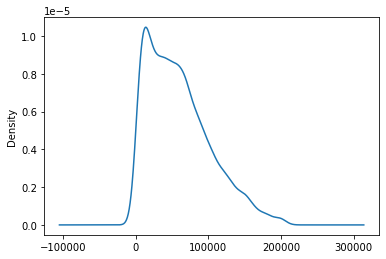

In [197]:
# Plot the distribution curve for the column `NormalizedAnnualCompensation`.
df['ConvertedComp'].plot(kind='kde')

In [198]:
## Plot the histogram for the column ConvertedComp.
fig = px.histogram(x=df['ConvertedComp'],title="Distribution of Salary")
fig.show()

<AxesSubplot:ylabel='Frequency'>

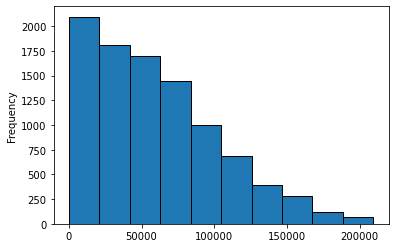

In [199]:
df['ConvertedComp'].plot(kind='hist', edgecolor='black')

- How many responders identified themselves only as a **Man**?
- Find out the median ConvertedComp of responders identified themselves only as a Woman?

In [200]:
# How many responders identified themselves only as a Man?
survey_df['Gender'].value_counts(dropna=False)

Man                                                            10391
Woman                                                            728
NaN                                                               72
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [201]:
# Education level
survey_df['EdLevel'].value_counts(dropna=False)

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              5802
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           2681
Some college/university study without earning a degree                                1351
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     515
Associate degree                                                                       381
Other doctoral degree (Ph.D, Ed.D., etc.)                                              257
Professional degree (JD, MD, etc.)                                                     153
NaN                                                                                    110
I never completed any formal education                                                  28
Primary/elementary school                                                               27
Name: EdLevel, dtype: int64

In [202]:
#The five number summary for the column `Age`
survey_df['Age'].describe()

count    11023.000000
mean        30.783208
std          7.396169
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [203]:
# Plot a histogram of the column `Age`.
fig = px.histogram(x=survey_df['Age'],title="Distribution of Age")
fig.show()
print ('The median age of respondents is about 29.')

The median age of respondents is about 29.


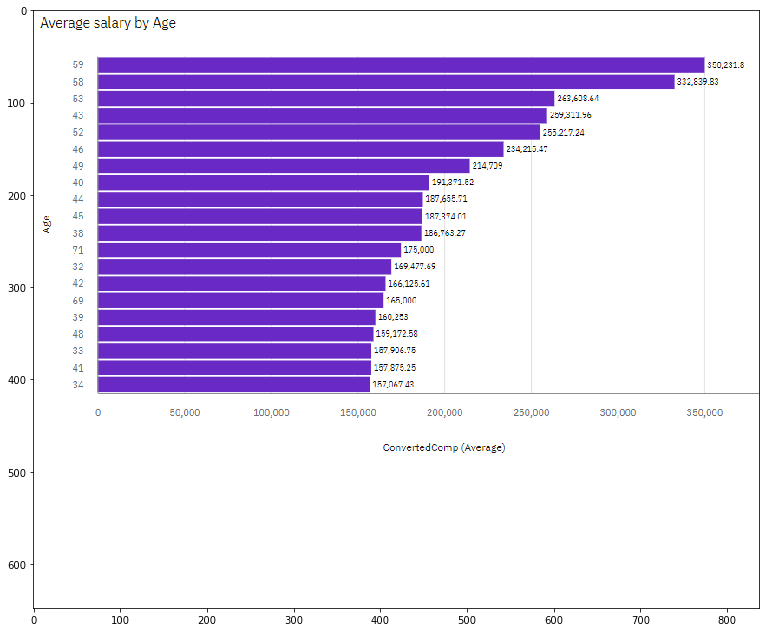

Top 3 average salaries belongs to respondents over 50 years old
Top 10 average salaries belongs to respondents over 40 years old


In [204]:
# Age-Salary processed in Tableau
img = plt.imread(r'C:\Users\User\Documents\IBM DATA ANALYST\Новая папка\Salary-Age.bmp')
plt.figure(figsize = (13,11))
plt.imshow(img, interpolation='nearest', aspect='auto')
plt.show()
print('Top 3 average salaries belongs to respondents over 50 years old')
print('Top 10 average salaries belongs to respondents over 40 years old')

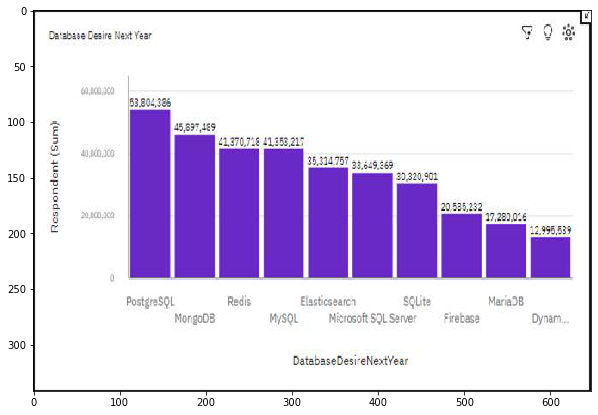

Current and aspiring data analysts should develop competence in NoSQL in addition to SQL database programs.


In [205]:
# Database desire next year in Tableau
img = plt.imread(r'C:\Users\User\Documents\IBM DATA ANALYST\Новая папка\Database desire next year.jpg')
plt.figure(figsize = (10,7))
plt.imshow(img, interpolation='nearest', aspect='auto')
plt.show()
print('Current and aspiring data analysts should develop competence in NoSQL in addition to SQL database programs.')

In [206]:
survey_df['Country'].value_counts()

United States        3099
India                 889
United Kingdom        809
Germany               703
Canada                427
                     ... 
Liechtenstein           1
Rwanda                  1
Brunei Darussalam       1
Cape Verde              1
Iraq                    1
Name: Country, Length: 135, dtype: int64

There is more Tableau vizuals in final presentation (please find attached)

## Correlation

In [207]:
# correlation between numerical columns.
print(df.corr())

               Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.020317       0.010088    -0.016362    0.002089   
CompTotal       -0.020317   1.000000      -0.064264     0.004928    0.016948   
ConvertedComp    0.010088  -0.064264       1.000000     0.034685   -0.088384   
WorkWeekHrs     -0.016362   0.004928       0.034685     1.000000    0.038245   
CodeRevHrs       0.002089   0.016948      -0.088384     0.038245    1.000000   
Age              0.002137   0.006285       0.403307     0.031773   -0.013405   

                    Age  
Respondent     0.002137  
CompTotal      0.006285  
ConvertedComp  0.403307  
WorkWeekHrs    0.031773  
CodeRevHrs    -0.013405  
Age            1.000000  


In [208]:
columns = ['Respondent', 'CompTotal', 'ConvertedComp', 'CodeRevHrs', 'Age']
corr_df = df[columns]

In [209]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [210]:
phik_corr = corr_df.phik_matrix()
phik_corr.round(2)

interval columns not set, guessing: ['Respondent', 'CompTotal', 'ConvertedComp', 'CodeRevHrs', 'Age']


,Respondent,CompTotal,ConvertedComp,CodeRevHrs,Age
Respondent,1.00,0.00,0.02,0.03,0.01
CompTotal,0.00,1.00,0.07,0.00,0.00
ConvertedComp,0.02,0.07,1.00,0.10,0.33
CodeRevHrs,0.03,0.00,0.10,1.00,0.00
Age,0.01,0.00,0.33,0.00,1.00


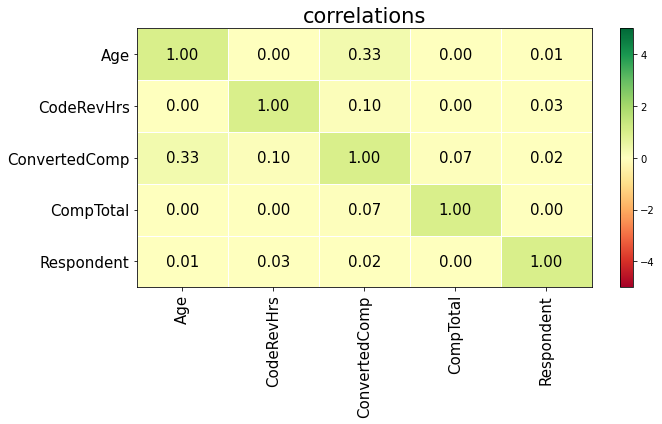

In [211]:
plot_correlation_matrix(phik_corr.fillna(0).values,
                       x_labels=phik_corr.columns,
                       y_labels=phik_corr.index,
                       vmin=-5, vmax=5, title="correlations",
                       usetex=False, fontsize_factor=1.5, figsize=(10, 6))
plt.tight_layout()

In [212]:
df.to_csv(r'C:\Users\User\Documents\IBM DATA ANALYST\df.csv')

In [213]:
survey_df.to_csv(r'C:\Users\User\Documents\IBM DATA ANALYST\survey_df.csv')

# **Conclusion**

- There is an increase in interest in non-relational databases, namely MongoDB, which likely reflects a growing need to handle non-relational and unstructured data.
- Current and aspiring data analysts should develop competence in NoSQL in addition to SQL database programs.
- There is an increase in interest in Python, TypeScript AWS platform.
- The median age of respondents is 29, the median salary of respondents is 58K.
- Majority of respondents have Bachelor’s degree, followed by Master’s degree holders
- Maximum average amount of salary belongs to respondents without formal education (only 26 respondents), followed by doctoral degree holders (245 respondents).
- Top 3 average salaries belongs to respondents over 50 years old
- Top 10 average salaries belongs to respondents over 40 years old